In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

In [4]:
data=pd.read_csv("/content/drive/MyDrive/Machine learning algorithms/filename.csv")
data

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1630366235354451969,1630152070530576385,2023-02-28 00:36:15 UTC,2023-02-28,00:36:15,0,1493761817406894086,tomasliptai,Tomas Liptai,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'nazijaeger__', 'name': 'nazi...",NaN,NaN,NaN,NaN
1,1630366226424778753,1630366226424778753,2023-02-28 00:36:13 UTC,2023-02-28,00:36:13,0,1526694166662721536,paperfloure,Smell the roses,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1630366225930027011,1630366225930027011,2023-02-28 00:36:13 UTC,2023-02-28,00:36:13,0,1053018392939167746,katetbar1,@etak,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1630366223056662530,1630351686974992385,2023-02-28 00:36:12 UTC,2023-02-28,00:36:12,0,602371247,jlhrdhmom,JLHrdh,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'MainelifeR', 'name': 'Mainel...",NaN,NaN,NaN,NaN
4,1630366221483884545,1629903982255644672,2023-02-28 00:36:12 UTC,2023-02-28,00:36:12,0,1053594763214184448,phemikali,rolarkcybersecurity,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Pottingpinks', 'name': 'GRS'...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10009,1630331110415646721,1630305860298633216,2023-02-27 22:16:41 UTC,2023-02-27,22:16:41,0,998476071292035072,ahk14061,Andre🇳🇴🇺🇦,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'wallacemick', 'name': 'Mick ...",NaN,NaN,NaN,NaN
10010,1630331106305122304,1630202100369043459,2023-02-27 22:16:40 UTC,2023-02-27,22:16:40,0,1477276764908965889,marxistswon,Marxists Won,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'tom_username_', 'name': 'Tom...",NaN,NaN,NaN,NaN
10011,1630331106296844288,1630301689818275840,2023-02-27 22:16:40 UTC,2023-02-27,22:16:40,0,1616822734214037504,johngerver21,John Gerver,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'elonmusk', 'name': 'Elon Mus...",NaN,NaN,NaN,NaN
10012,1630331102480171009,1630181795101540357,2023-02-27 22:16:39 UTC,2023-02-27,22:16:39,0,25588052,late49er,Ben Davis,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'RonFilipkowski', 'name': 'Ro...",NaN,NaN,NaN,NaN


In [5]:
data.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [8]:
#we need only three columns for this task, [username,tweet,language]
data=data[['username','tweet','language']]
data

,username,tweet,language
0,tomasliptai,@nazijaeger__ @derwener @Anonymous9775 Russia ...,en
1,paperfloure,The Russia HAARP which could destroy USA in on...,en
2,katetbar1,Putin gives Steven Seagal Russia&amp;#8217;s O...,en
3,jlhrdhmom,@MainelifeR @BaddCompani It’s ALWAYS PROJECTIO...,en
4,phemikali,@Pottingpinks @mfa_russia @mod_russia @mil_his...,en
...,...,...,...
10009,ahk14061,@wallacemick Its not Ukraine which investere w...,en
10010,marxistswon,@tom_username_ There were very dark rumors tha...,en
10011,johngerver21,@elonmusk If Russia lose the Rothschild are co...,en
10012,late49er,@RonFilipkowski Look forward to Russia liberat...,en


In [9]:
data.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

In [10]:
data['language'].value_counts()

language
en     8858
pt      440
it      194
qme     105
und      60
in       47
ru       44
ja       42
es       36
ca       20
qht      20
th       19
fr       18
de       14
ko        9
vi        8
nl        8
ro        7
fi        7
ar        6
zxx       6
uk        6
cs        6
zh        5
pl        5
qam       4
tl        4
da        3
eu        2
no        2
hi        2
tr        2
hu        1
cy        1
lv        1
el        1
bn        1
Name: count, dtype: int64

In [13]:
#remove all the links, symbols, punctuation, other language errors
nltk.download('stopwords')
stemmer=nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))
def clean(text):
  text=str(text).lower()
  text=re.sub('\[.*?\]','',text)
  text=re.sub('https?://\S+|www\.\S+',"",text)
  text=re.sub('<.*?>+','',text)
  text=re.sub('[%S]'% re.escape(string.punctuation),'',text)
  text=re.sub('\n','',text)
  text=re.sub('\W*\d\W*','',text)
  text=[word for word in text.split(" ") if word not in stopword]
  text=" ".join(text)
  text=[stemmer.stem(word) for word in text.split(' ')]
  text=' '.join(text)
  return text
  data['tweet']=data['tweet'].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


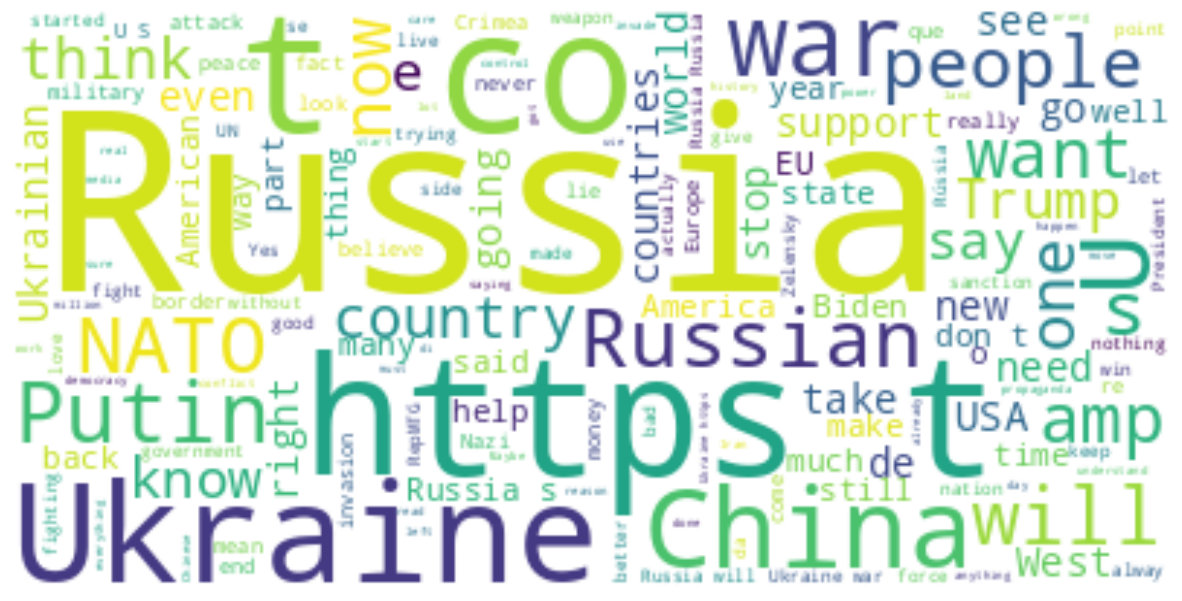

In [14]:
#lets have the wordcloud for the frequently used words
text=" ".join(i for i in data.tweet)
stopwords=set(STOPWORDS)
wordcloud=WordCloud(stopwords=stopwords,background_color='white').generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud,inter
           polation='bilinear')
plt.axis("off")
plt.show()

In [15]:
#adding the positive negative and neutral columns by calculating the sentiment scores of the tweets
nltk.download('vader_lexicon')
sentiments=SentimentIntensityAnalyzer()
data['Positive']=[sentiments.polarity_scores(i)['pos'] for i in data['tweet']]
data['Negative']=[sentiments.polarity_scores(i)['neg'] for i in data['tweet']]
data['Neutral']=[sentiments.polarity_scores(i)['neu'] for i in data['tweet']]
data=data[['tweet','Positive','Negative','Neutral']]
print(data.head())


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                               tweet  Positive  Negative  \
0  @nazijaeger__ @derwener @Anonymous9775 Russia ...     0.189     0.000   
1  The Russia HAARP which could destroy USA in on...     0.000     0.308   
2  Putin gives Steven Seagal Russia&amp;#8217;s O...     0.266     0.000   
3  @MainelifeR @BaddCompani It’s ALWAYS PROJECTIO...     0.000     0.000   
4  @Pottingpinks @mfa_russia @mod_russia @mil_his...     0.043     0.074   

   Neutral  
0    0.811  
1    0.692  
2    0.734  
3    1.000  
4    0.883  


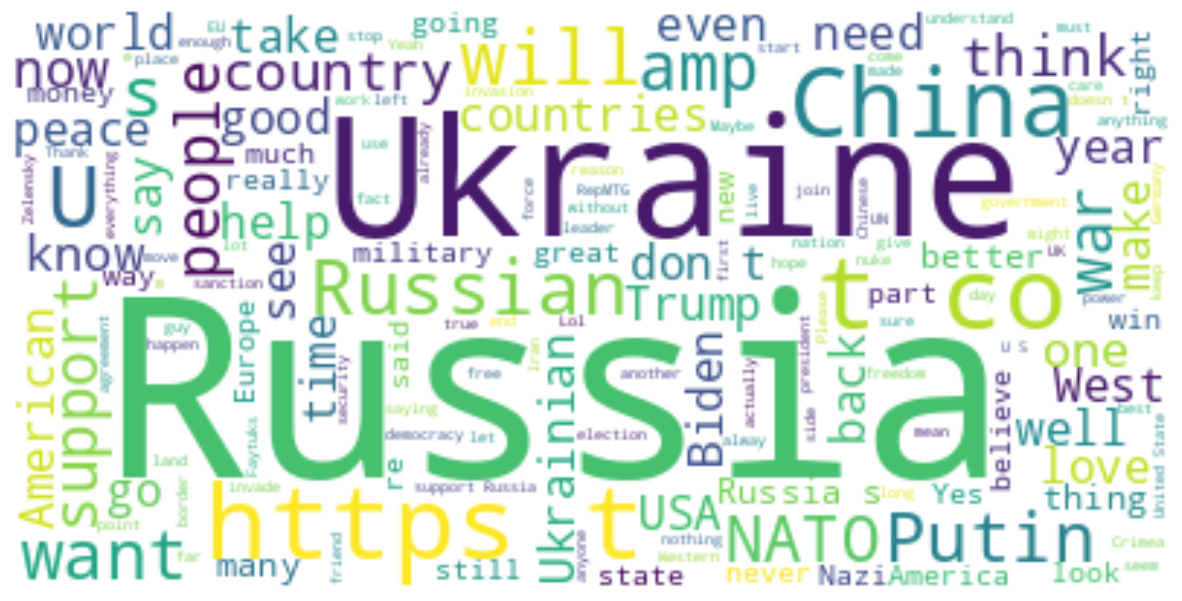

In [18]:
#most frequent words by people positive sentiments
positive=' '.join([i for i in data['tweet'][data['Positive']>data['Negative']]])
stopwords=set(STOPWORDS)
wordcloud=WordCloud(stopwords=stopwords,background_color='white').generate(positive)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()


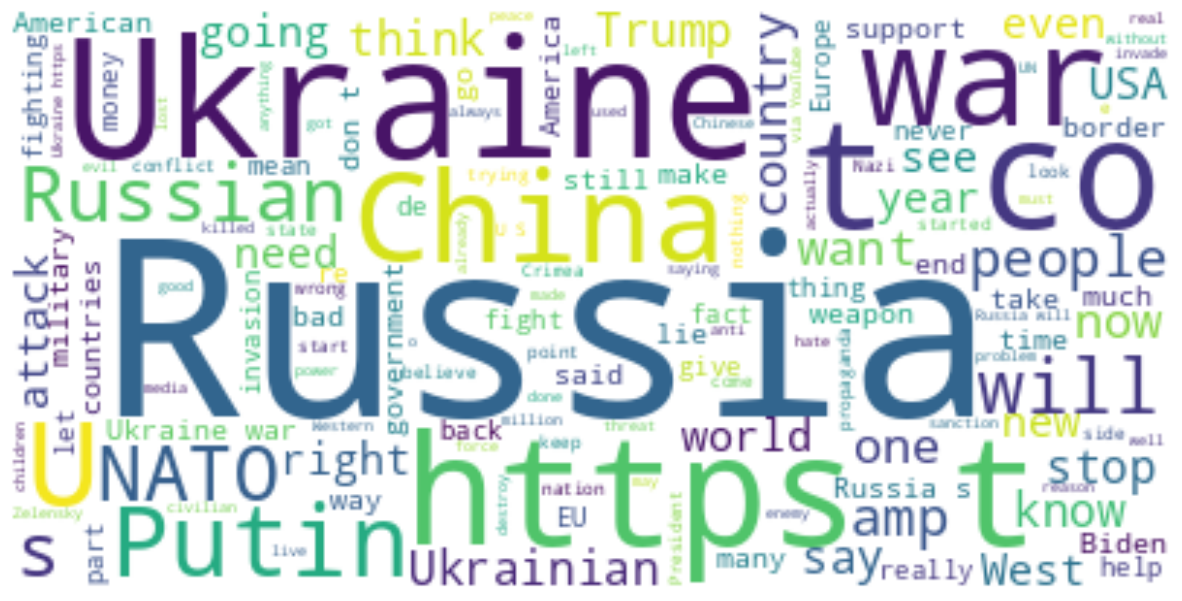

In [19]:
negative=' '.join([i for i in data['tweet'][data['Negative']>data['Positive']]])
stopwords=set(STOPWORDS)
wordcloud=WordCloud(stopwords=stopwords,background_color='white').generate(negative)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()